In [1]:
# Importing relevant python packages

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")

plt.style.use('bmh')


All packages imported!


In [2]:
# Reading the air_visit_data csv file into a dataframe
air_visit_data = pd.read_csv(os.path.join(os.getcwd(),'Data', 'air_visit_data.csv'))

# Converting visit_date column from a string into a datetime

air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])

# Using resampling and mean and sum functions to obtain the average number 
# of visit per restaurant each week

edited_dataframe = air_visit_data.set_index('visit_date')
resampled_by_day = edited_dataframe.resample(rule='D',  origin = '2016-01-13')
mean_data_per_day = resampled_by_day.mean()
resampled_by_week = mean_data_per_day.resample(rule='W',  origin = '2016-01-13')
mean_data_per_week = resampled_by_week.sum()

Text(0, 0.5, 'Store Category')

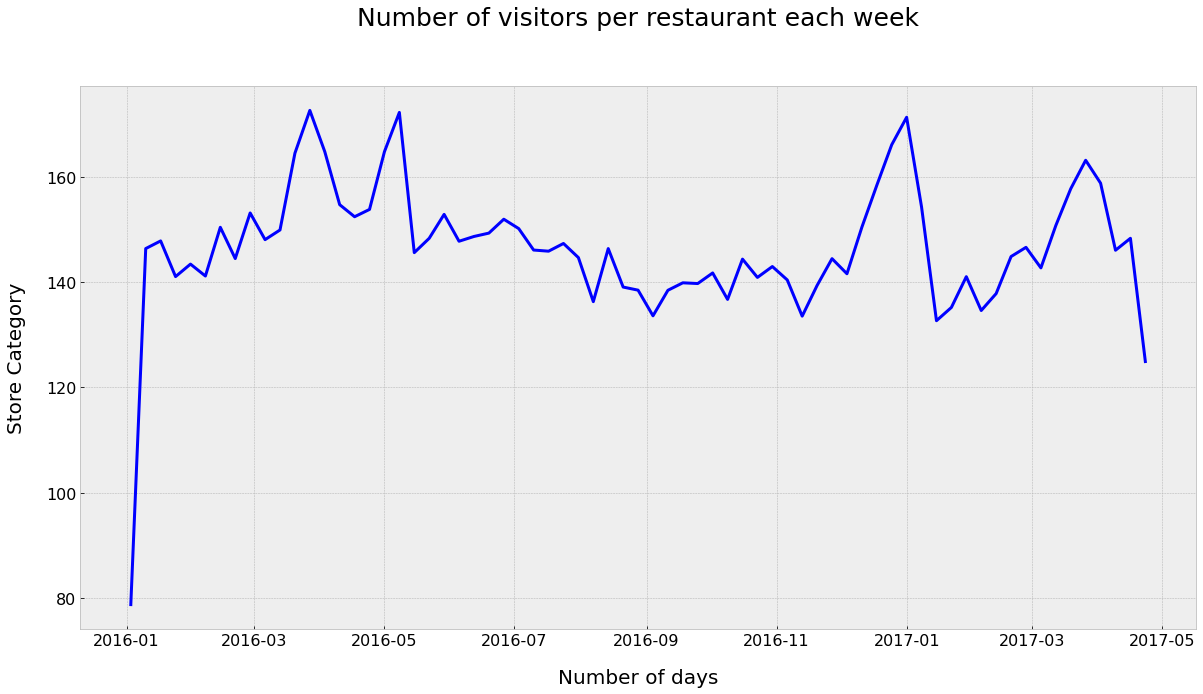

In [3]:
# Plotting the data

fig = plt.figure(figsize = (20,10))
axes = fig.add_subplot(1,1,1)

# Plotting the data and setting the x and y labels

axes.plot(mean_data_per_week.index, mean_data_per_week['visitors'],'b-',label = 'Linear  Data', linewidth=3)
axes.set_title('Number of visitors per restaurant each week', fontsize = 25,y = 1.1)
axes.set_xlabel("x-axis")
axes.set_ylabel("Values after applying function")

# Formatting the fontsizes and positions of the labels and the ticklabels
axes.tick_params(axis='x', labelsize = 16)
axes.tick_params(axis='y', labelsize = 16)
axes.set_xlabel('Number of days',fontsize = 20 ,labelpad = 20)
axes.set_ylabel('Store Category',fontsize = 20 ,labelpad = 20)


During January 2016, the total number of visitors vising a restaurant each week is quite low. This is likely because people are going out less following Christmas, which is a popular time for going out, shopping and in general spending money. This can be seen at the end of 2017, where in December there is a spike in visits to restaurants. March and April are also particulaly popular times as Spring Cherry Blossoms bloom over this time. These are a popular tourist attractions as well as being popular for the locals, who travel to "cherry blossom viewing spots". As a result in people travelling to these spots, it makes sense that restaurants are more popular during this time. 